In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("ha.csv")
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [2]:
q1 = data.resting_blood_pressure.quantile(0.25)
q2 = data.resting_blood_pressure.quantile(0.75)
print(q1,q2)
IQR = q2-q1
print(IQR)
lower_limit = q1-1.5*IQR
upper_limit = q2+1.5*IQR
print(lower_limit,upper_limit)

q3 = data.cholesterol.quantile(0.25)
q4 = data.cholesterol.quantile(0.75)
print(q3,q4)
IQR = q4-q3
print(IQR)
lower_limit1 = q3-1.5*IQR
upper_limit1= q4+1.5*IQR
print(lower_limit1,upper_limit1)

q5 = data.max_heart_rate_achieved.quantile(0.25)
q6 = data.max_heart_rate_achieved.quantile(0.75)
print(q5,q6)
IQR = q6-q5
print(IQR)
lower_limit2 = q5-1.5*IQR
upper_limit2 = q6+1.5*IQR
print(lower_limit2,upper_limit2)

df_no_outlier =data[(data.resting_blood_pressure>lower_limit)&(data.resting_blood_pressure<upper_limit)&(data.cholesterol>lower_limit1)&(data.cholesterol<upper_limit1)&(data.max_heart_rate_achieved>lower_limit2)&(data.max_heart_rate_achieved<upper_limit2)]
#df_no_outlier = data[(data.max_heart_rate_achieved>lower_limit2)&(data.max_heart_rate_achieved<upper_limit2)]
X = df_no_outlier.drop('target',axis=1)
y = df_no_outlier['target']
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

120.0 140.0
20.0
90.0 170.0
188.0 269.75
81.75
65.375 392.375
121.0 160.0
39.0
62.5 218.5


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

/home/nisarga/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/nisarga/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


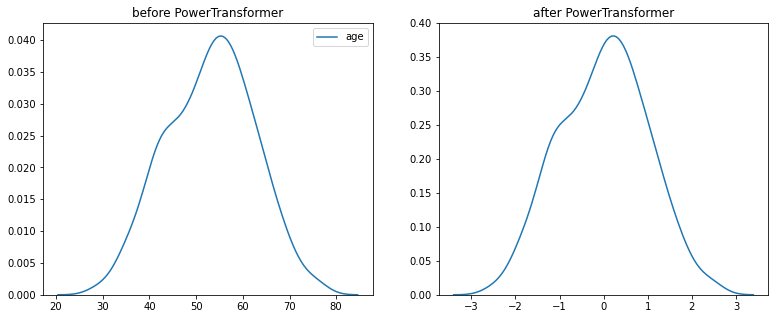

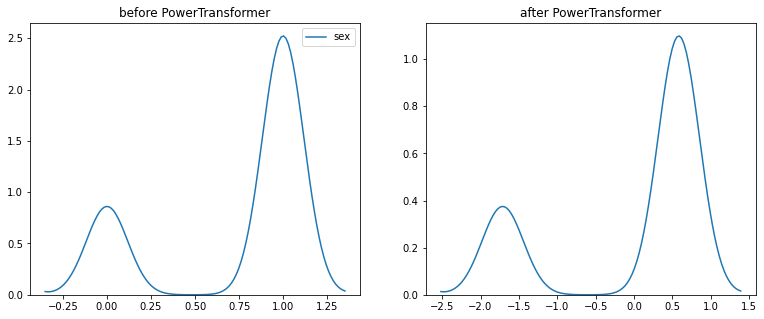

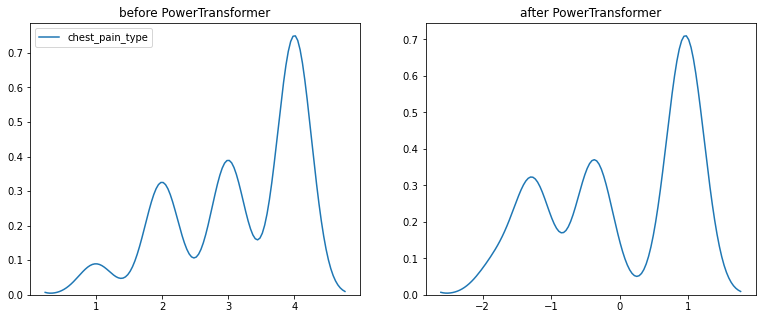

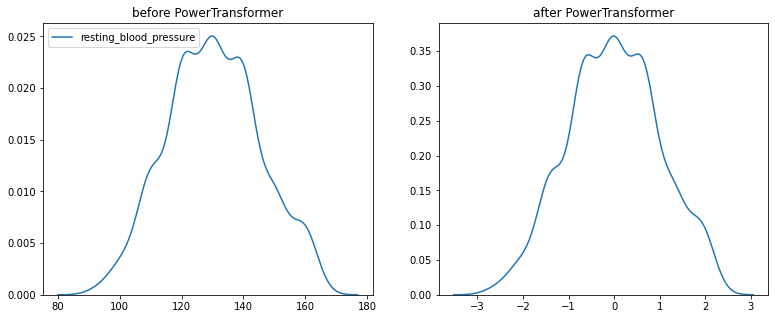

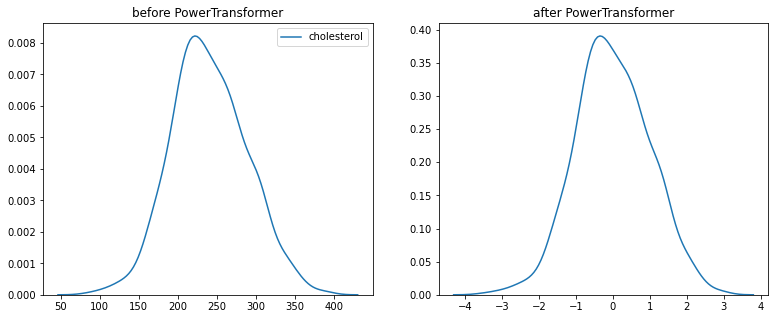

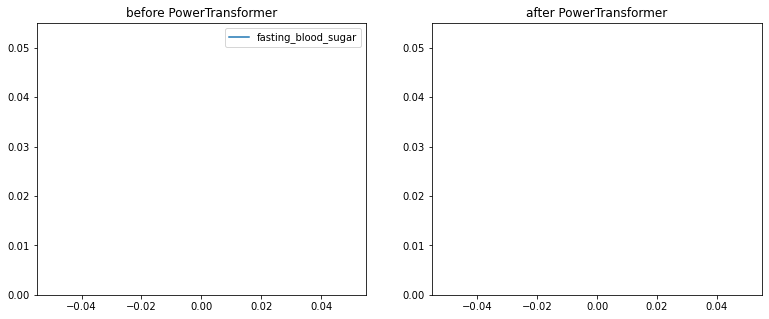

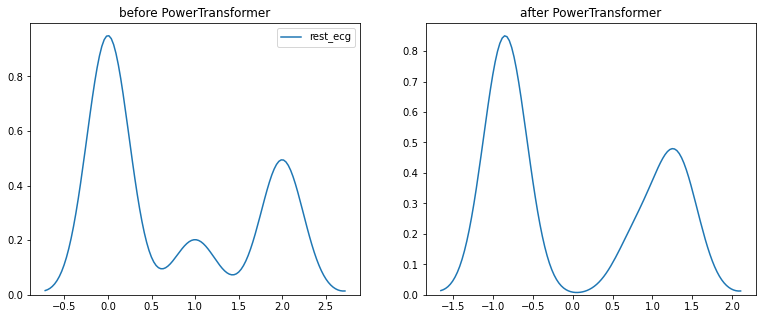

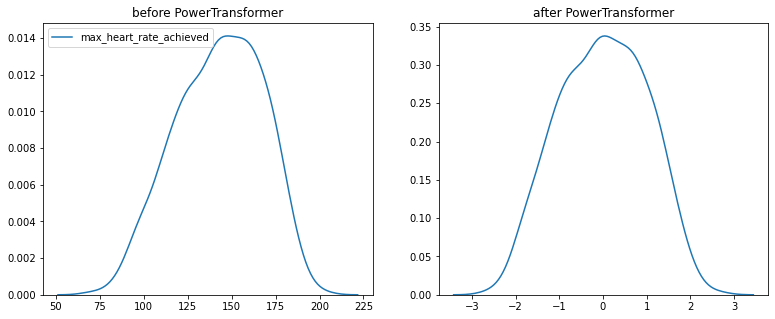

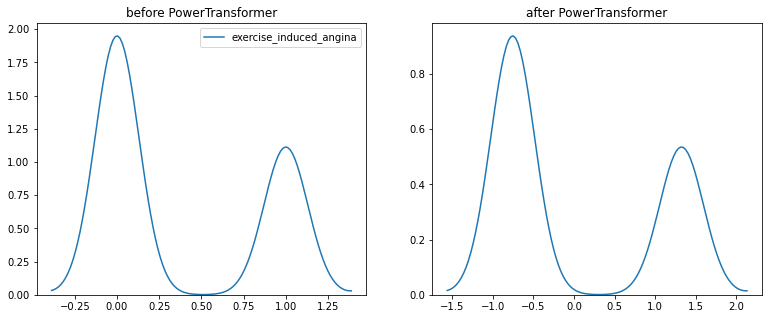

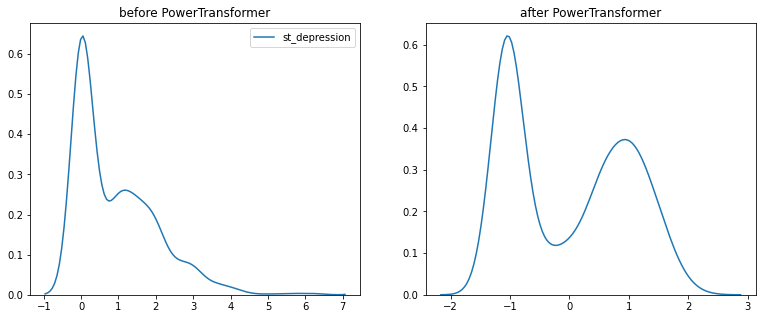

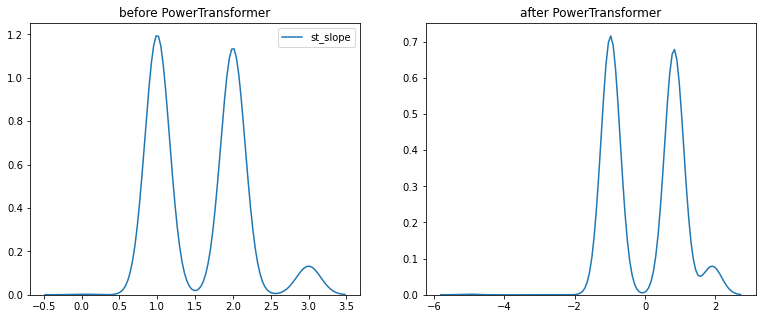

In [14]:
from sklearn.preprocessing import PowerTransformer
for col in X.columns:
    plots(X, col, PowerTransformer(method ='yeo-johnson', standardize=True))

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
p = PowerTransformer(method='yeo-johnson', standardize=True)
p.fit_transform(X_train)

array([[ 0.9627571 ,  0.59347484, -1.79779304, ..., -0.7563177 ,
        -0.5383032 , -0.9515659 ],
       [ 0.208923  ,  0.59347484, -1.25829707, ..., -0.7563177 ,
        -1.03389449, -0.9515659 ],
       [-0.32452597, -1.68499139, -1.25829707, ..., -0.7563177 ,
        -1.03389449, -0.9515659 ],
       ...,
       [-1.06354567, -1.68499139,  0.95276542, ...,  1.32219569,
         1.5109485 ,  0.83751328],
       [ 0.10188507, -1.68499139, -0.36084842, ..., -0.7563177 ,
        -1.03389449, -0.9515659 ],
       [ 0.4235012 ,  0.59347484, -0.36084842, ..., -0.7563177 ,
         0.97050069, -0.9515659 ]])

In [16]:
p.lambdas_

array([ 1.08799834,  4.88024618,  2.52017895,  0.51216228,  0.80474262,
       -9.76457601, -1.25127051,  1.43615024, -2.46939511, -0.7191209 ,
       -0.55968916])

In [17]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', PowerTransformer(method='yeo-johnson', standardize=True)),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model_accuracy_scaled(RandomForestClassifier(n_estimators=190, *, criterion='gini', max_depth=4, min_samples_split=4, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=45, warm_start=True, class_weight=None, ccp_alpha=0.0, max_samples=None)

SyntaxError: invalid syntax (<ipython-input-22-94340a98dc48>, line 2)

In [36]:
model_accuracy_scaled(RandomForestClassifier(n_estimators=500,max_features='log2',max_depth=4,criterion='gini',warm_start=True,min_samples_split=4,bootstrap=True,min_samples_leaf=2,random_state=45))

0.837696335078534